## Abstract

To investigate the dataset "Countries of the world" by Fernando Lasso. The main focus would be on the factors that affect a country's GDP per capita and to make a model using the data of 227 countries from the dataset. we are find factors affecting a country's GDP per capita in order to make a predictive model of countries GDP and to correct the errors in the already mentioned code. This is a practice for EDA and visualization.

The folowing code is used to import the libraries which we would be using for the analysis of the given dataset

In [8]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Data Wrangling


In this section the data will be loaded and some operations will be performed to inspect data types or to look for missing values. Data cleaning operations will be executed in the same section where a specific attribute is being analyzed.

### General Properties

Following is code is used to import the data set on which the analysis is to be performed

In [9]:
# importing the dataset
df = pd.read_csv('countries of the world.csv', decimal=',')

Now we need to see the data on which the analysis is to be done.The following code retuns the values of the the data set on which analysis is to be performed. It will help us to understnad on what type of data we are working i.e what are the different fields of the dataset. This will help in making a better analysis.

In [10]:
df.head() #To view the intial 5 data entries

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


The following code is used to find:

1. count
2. Mean
3. Standard Devatiion
4. Upper Percentile, Lower Percentile and 50th percentile 
5. Minimum,Maximum and NaN values

In [11]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


The Following code displays the top 20 countries in descending order of their respective GDPs.

In [12]:
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=False)
# Look at top 20
top_gdp_countries[['GDP ($ per capita)','Country']].head(20)

,GDP ($ per capita),Country
121,55100.0,Luxembourg
154,37800.0,Norway
214,37800.0,United States
22,36000.0,Bermuda
38,35000.0,Cayman Islands
177,34600.0,San Marino
196,32700.0,Switzerland
54,31100.0,Denmark
93,30900.0,Iceland
12,30000.0,Austria


## Bar Plot Analysis

The bar graphs below compares GDP of different countries and gives a visual representation of the same. It shows the relationship between a numerical variable GDP of different countries. The bars are arranged in descending order so that is becomes more indformative i.e we will be able to analysis what is the similarity between the attributes of two countries having approxiamtely same GDP.

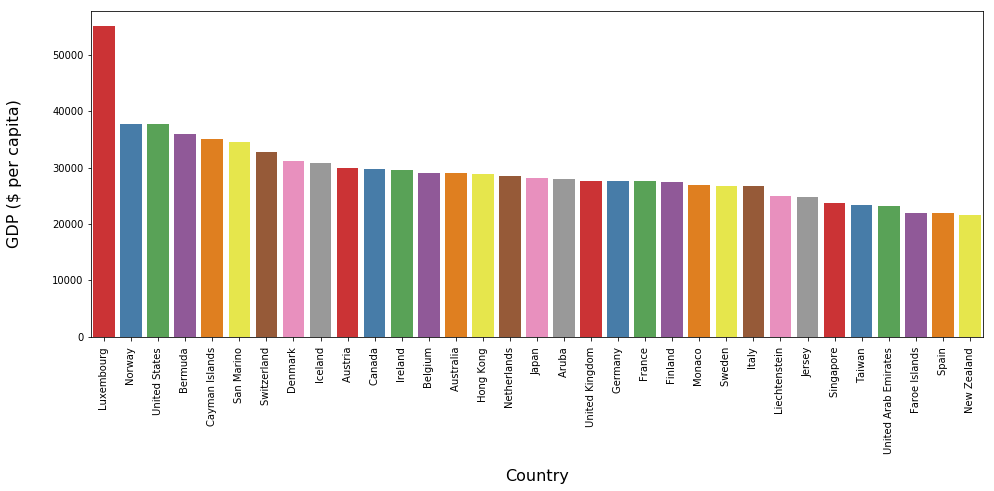

In [13]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

This barplot display 33 countries with the low GDP arranged in descending order of their GDP. It helps to make various analysis such as countries having same GDP can be further analyised to find out similar attributes which are affecting for the downfall of the GDP.

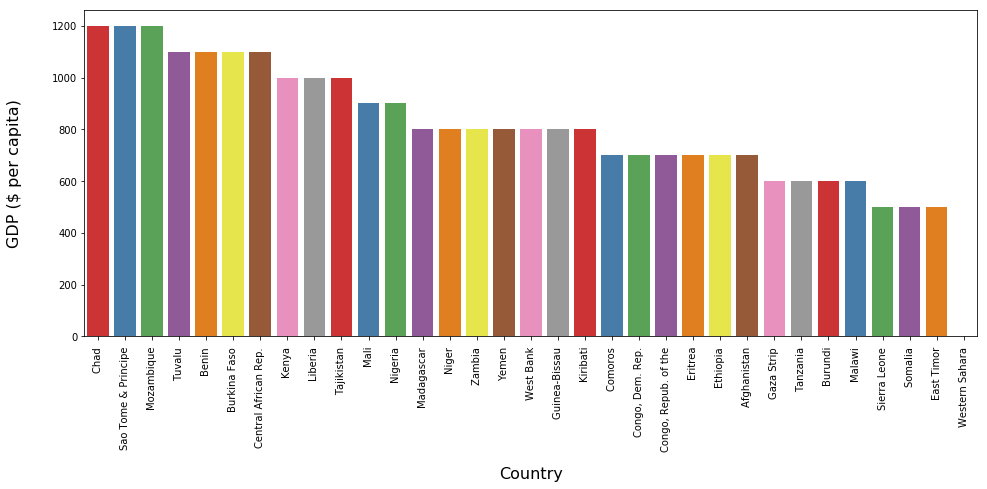

In [14]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

The following code is used to find the number rows having null value for a column. Also sum function is used to total the null row values for a particular column.This helps to find out how many null values each column has. Also it show us the percentage of missing values for each attribute by calculating the the missing values for each attribute and then calculating the it percentage over all the values for that particular attribute. 

In [15]:
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
Climate,22,9.69
Literacy (%),18,7.93
Industry,16,7.05
Service,15,6.61
Agriculture,15,6.61
Deathrate,4,1.76
Phones (per 1000),4,1.76
Birthrate,3,1.32
Infant mortality (per 1000 births),3,1.32
Net migration,3,1.32


The followig code gives us the total of null values for a each attribute.

In [16]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

It gives us the total number of null values in the given dataset.

In [17]:
df.isnull().sum().sum()

110

### Filling the missing values

We see that there is missing data in the table. I am filling the missing data using median of the region in which the country belongs. As it is observed that countries beloning to similar geographical region are often similar in ways. First we are grouping Literacy and Agriculture attributes and finding median value for each region.

In [18]:
df.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


Now we are filling the missing values and to do so we find the median of the cloumn for which the values are missing in a given region and fill the missing values with median vlaues. In case of climate we calculate the mode stead of median as it seems that 'climate' is a categorical feature here.

In [19]:
for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = df.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = df.groupby('Region')[col].median()
    for region in df['Region'].unique():
        df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]

C:\Users\janiv\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [21]:
np.random.seed(sum(map(ord, "distributions")))

In [22]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.3800,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.2320,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.1010,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.1505,0.171,0.644
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.0220,0.245,0.720


# Box Plot Analysis

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

Over here we need to find information on the variability or dispersion of the data. The boxplot gives us a good indication of how the values in the data are spread out.

Boxplot have the advantage of taking up less space, which is useful when comparing distributions between many groups or datasets.
The following boxplot indicates that 75% of 227 which is around 170 countries have literacy percentage greater than 75%. Also the boxplot is skewed towards left.

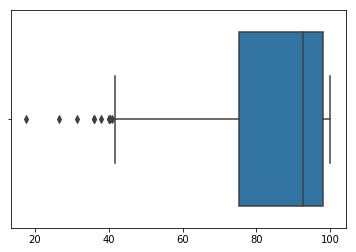

In [23]:
sns.boxplot(np.array(df['Literacy (%)']))

The following boxplot indicates that 75% of 226 which is around 170 countries have GDP less than 15000. Also the boxplot is skewed towards right.

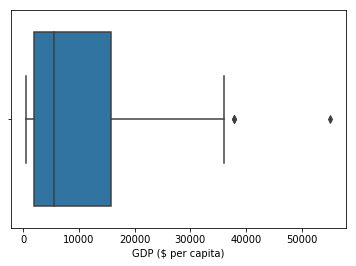

In [24]:
sns.boxplot(df['GDP ($ per capita)'])

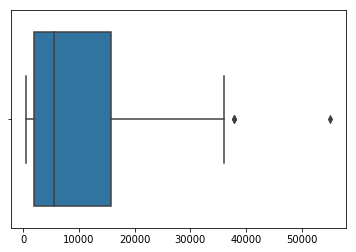

In [25]:
sns.boxplot(np.array(df['GDP ($ per capita)']))

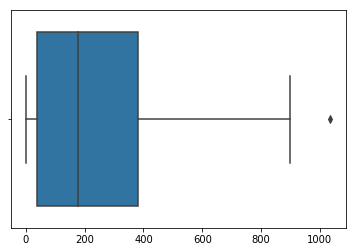

In [26]:
sns.boxplot(np.array(df['Phones (per 1000)']))

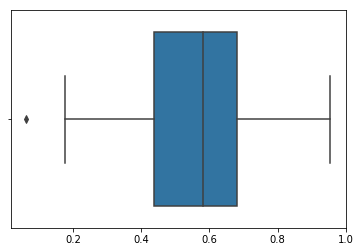

In [27]:
sns.boxplot(np.array(df['Service']))

# Correlation

Now to find measure association between each variable we are calculating the correlation between them. Negative correlation is a relationship between two variables in which one variable increases as the other decreases, and vice versa. A perfect negative correlation is represented by the value -1.00, a 0.00 indicates no correlation, and a +1.00 indicates a perfect positive correlation. Hence from the below table it can be deduced that correlation between same variable will always be 1.
Now consider the association between GDP and Phones (per 1000) is 0.832364 which indicates that if the value of Phones (per 1000) increases there will be an increase in GDP($per capita).
Association between GDP and Birthrate is -0.643199 which indicates that as the birthrate increases GDP decreases.

In [28]:
df.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.469985,-0.028190,-0.068199,0.000122,0.024488,-0.038915,-0.051610,-0.029235,0.188337,-0.059617,-0.121118,-0.024329,-0.044151,-0.025974,0.004867,0.105732,-0.087356
Area (sq. mi.),0.469985,1.000000,-0.066917,-0.095627,0.047537,-0.005120,0.072460,0.025954,0.055026,-0.079270,-0.142234,0.137956,0.031986,-0.064822,0.042418,-0.048821,0.127401,-0.057227
Pop. Density (per sq. mi.),-0.028190,-0.066917,1.000000,0.241690,0.178088,-0.142741,0.196063,0.098487,0.280818,-0.080857,-0.032460,0.082066,0.061828,-0.157909,-0.067910,-0.110235,-0.116734,0.229223
Coastline (coast/area ratio),-0.068199,-0.095627,0.241690,1.000000,-0.133947,-0.138223,0.049561,0.133112,0.153204,-0.120760,0.338889,-0.078312,-0.006490,-0.074021,-0.162705,-0.036301,-0.214819,0.210201
Net migration,0.000122,0.047537,0.178088,-0.133947,1.000000,-0.024876,0.382029,-0.015620,0.239160,-0.059334,-0.344337,0.225740,0.027798,-0.064947,0.033575,-0.107105,-0.019156,0.110103
Infant mortality (per 1000 births),0.024488,-0.005120,-0.142741,-0.138223,-0.024876,1.000000,-0.595432,-0.758702,-0.666699,-0.113607,-0.070197,0.128063,-0.373921,0.844442,0.655891,0.706734,0.028859,-0.640007
GDP ($ per capita),-0.038915,0.072460,0.196063,0.049561,0.382029,-0.595432,1.000000,0.508839,0.832364,0.023937,-0.218093,0.093737,0.361704,-0.643199,-0.196322,-0.585987,-0.034993,0.553994
Literacy (%),-0.051610,0.025954,0.098487,0.133112,-0.015620,-0.758702,0.508839,1.000000,0.587440,0.085269,0.038372,-0.088522,0.425807,-0.776946,-0.376756,-0.594062,0.019528,0.505618
Phones (per 1000),-0.029235,0.055026,0.280818,0.153204,0.239160,-0.666699,0.832364,0.587440,1.000000,0.068853,-0.150700,0.022293,0.436692,-0.721099,-0.253033,-0.599405,-0.158178,0.670933
Arable (%),0.188337,-0.079270,-0.080857,-0.120760,-0.059334,-0.113607,0.023937,0.085269,0.068853,1.000000,0.094614,-0.856770,0.377806,-0.195100,0.060153,-0.023227,-0.048444,0.066550


Now we have created a heatmap for the above corelation.

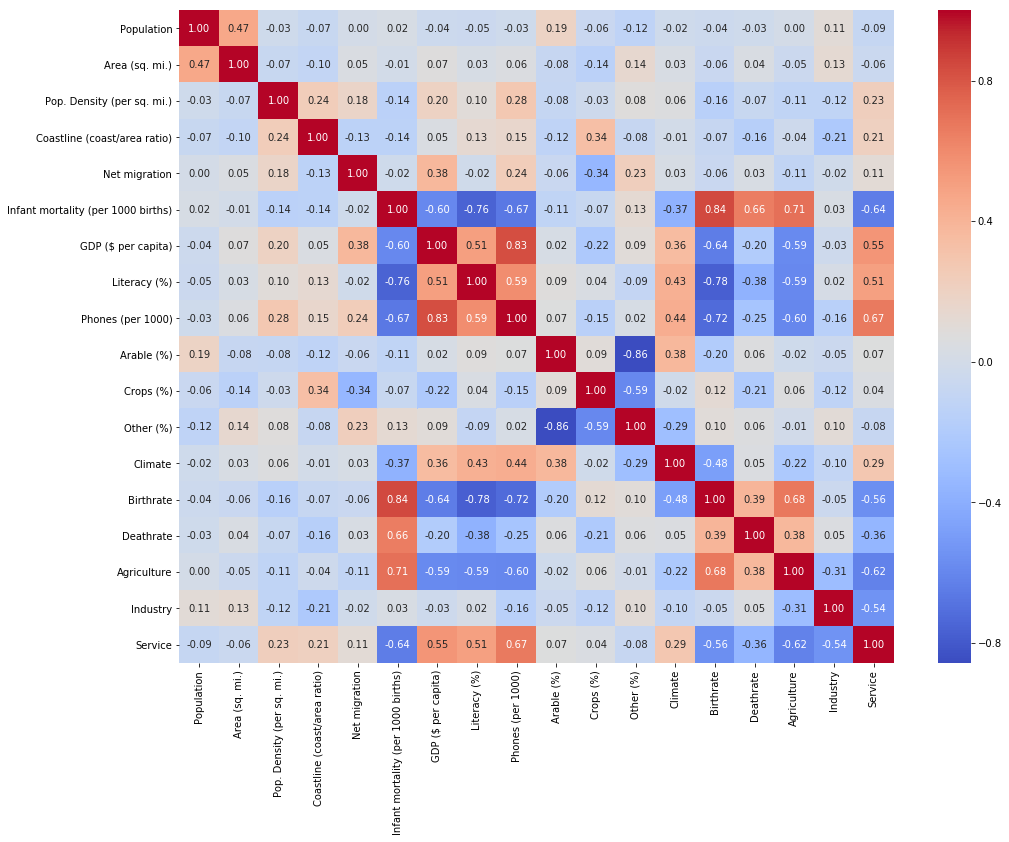

In [29]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [30]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Service','Infant mortality (per 1000 births)','Birthrate']]

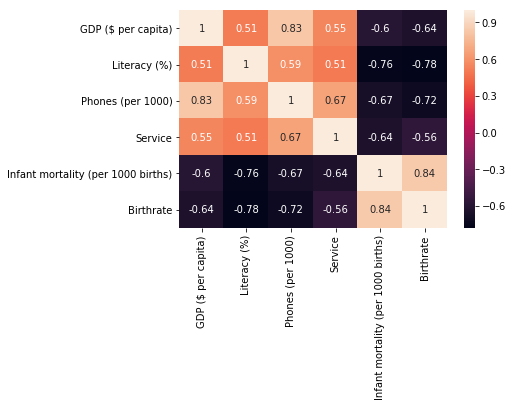

In [31]:
# show corr of the same
sns.heatmap(x.corr(), annot=True)

## Scatter Plot Analysis

The scatter plots of the independent variables with the target variable are either in a linear or non linear fashion depicting positive or negative correlation. 

As the the variables are arranged in the descending order of their correlation, the scatter plots of the first 3 variables show strong correlation with GDP but as the correlation reduces the scatter plots become more vague. This is very evident in the scatter plots of Net migration and Deathrate that don't show strong correlation.  

From the above scatter plots, Phones(per 1000), Birthrate and infant mortality(per 100 births) show well defined shape of the data points in relation with GDP. This shows that they have a strong correlation with GDP. 

Also, the scatter plots for Net migration, deathrate and crops do not show a well defined shape along which a curve can be visualised, thus it is inferred that they have weak relationship with GDP.

From the scatter plots it is quite evident that 'Phones(per 1000)' and 'Birthrate' have the highest correlation with GDP($ per capita)

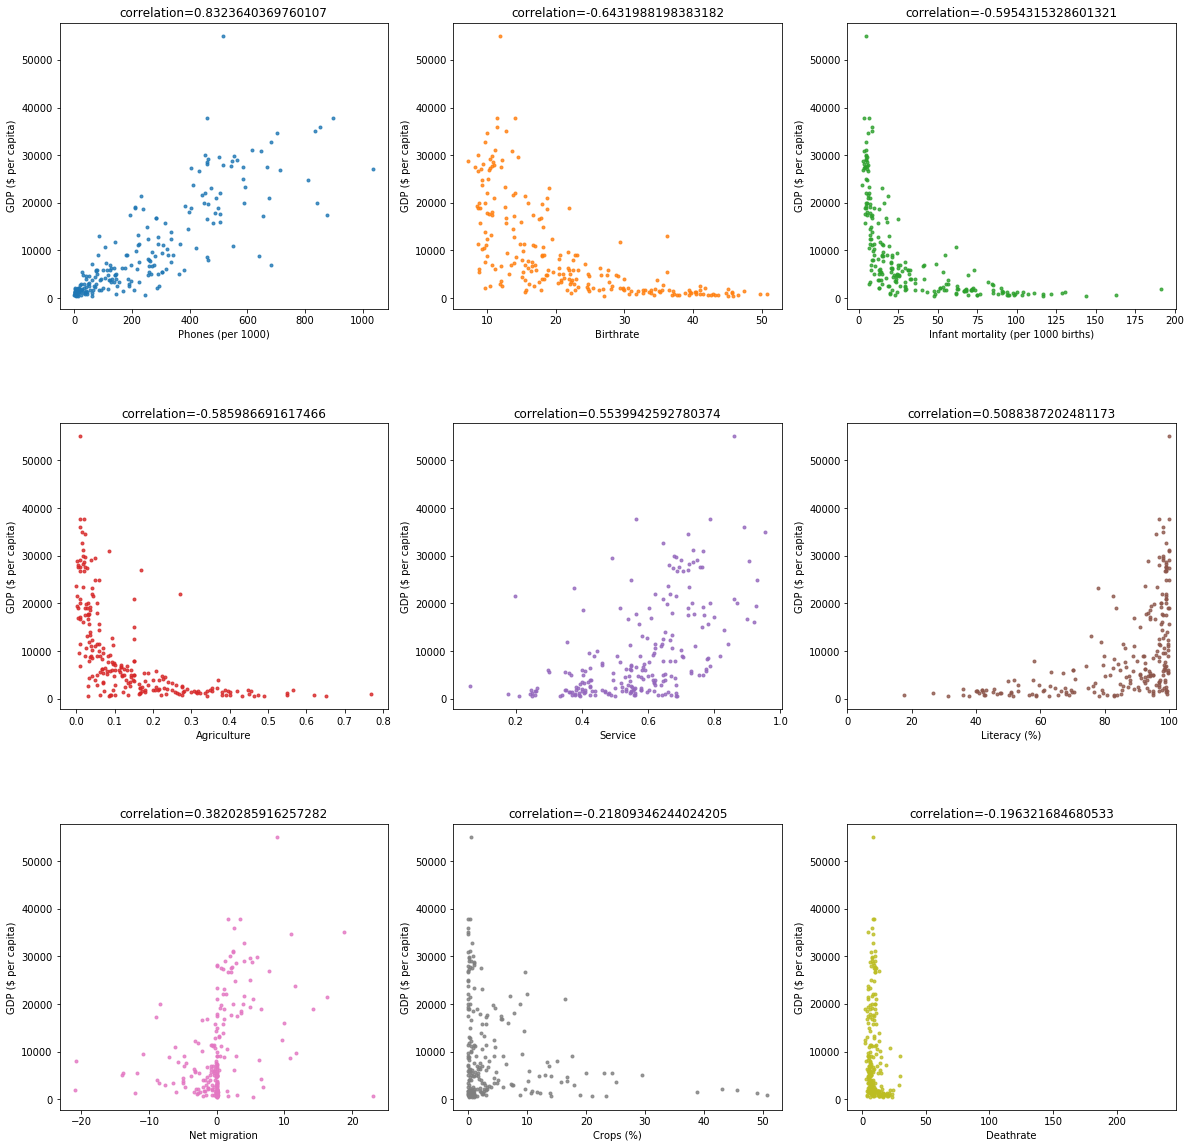

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = df['GDP ($ per capita)'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [33]:
df.groupby('Region')[['GDP ($ per capita)', 'Phones (per 1000)', 'Service']].median()

,GDP ($ per capita),Phones (per 1000),Service
Region,,,
ASIA (EX. NEAR EAST),3450.0,61.50,0.4950
BALTICS,11400.0,321.40,0.6660
C.W. OF IND. STATES,3450.0,155.35,0.4595
EASTERN EUROPE,9100.0,296.05,0.5910
LATIN AMER. & CARIB,6300.0,222.85,0.6180
NEAR EAST,9250.0,211.00,0.5840
NORTHERN AFRICA,6000.0,123.60,0.4255
NORTHERN AMERICA,29800.0,683.20,0.7870
OCEANIA,5000.0,118.60,0.6440


## Pair Plot

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

We see that life expectancy and gdp per capita are negatively correlated showing that as the the Birthrate increases th eGDP decreases(although this of course does not prove that one causes the other).

In [34]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Phones (per 1000)','Birthrate']]

In [35]:
df.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

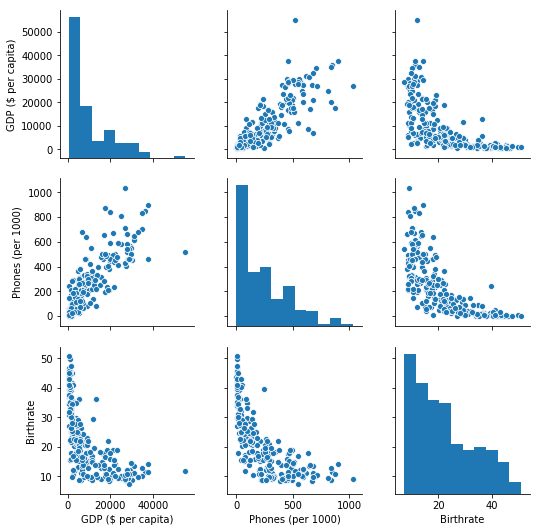

In [36]:
sns.pairplot(x)

There are 2 categorical columns (Region and Climate) and all other are numerical columns. The default pairs plot in seaborn only plots numerical columns although later we will use the categorical variables for coloring.

As climate has no effect on GDP we use Region for coloring.

In [50]:
y = df[['GDP ($ per capita)','Phones (per 1000)','Birthrate','Region']]

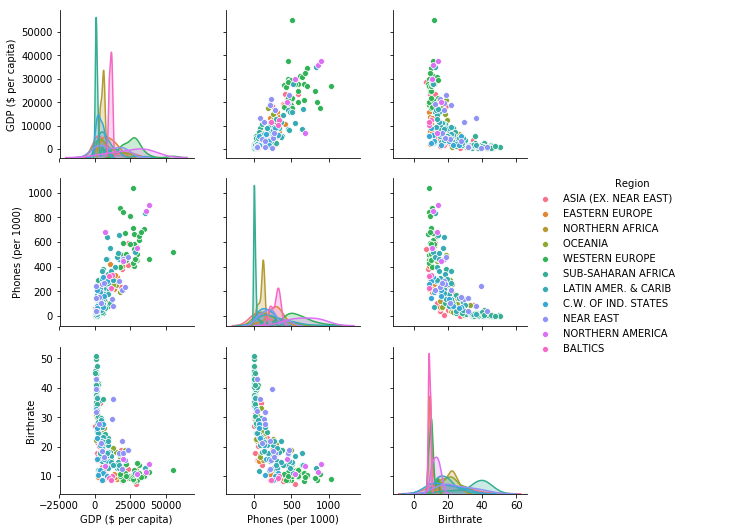

In [52]:
sns.pairplot(y, hue='Region')

In [39]:
gdp_no_nan= df['GDP ($ per capita)'][~np.isnan(df['GDP ($ per capita)'])]
gdp_no_nan

0        700.0
1       4500.0
2       6000.0
3       8000.0
4      19000.0
5       1900.0
6       8600.0
7      11000.0
8      11200.0
9       3500.0
10     28000.0
11     29000.0
12     30000.0
13      3400.0
14     16700.0
15     16900.0
16      1900.0
17     15700.0
18      6100.0
19     29100.0
20      4900.0
21      1100.0
22     36000.0
23      1300.0
24      2400.0
25      6100.0
26      9000.0
27      7600.0
28     16000.0
29     18600.0
        ...   
197     3300.0
198    23400.0
199     1000.0
200      600.0
201     7400.0
202     1500.0
203     2200.0
204     9500.0
205     6900.0
206     6700.0
207     5800.0
208     9600.0
209     1100.0
210     1400.0
211     5400.0
212    23200.0
213    27700.0
214    37800.0
215    12800.0
216     1700.0
217     2900.0
218     4800.0
219     2500.0
220    17200.0
221     3700.0
222      800.0
223     6000.0
224      800.0
225      800.0
226     1900.0
Name: GDP ($ per capita), Length: 227, dtype: float64

## Dist Plot

Dispt plot allows to show distribution of univariance list of observations(That is of one variable)
Density plots for GDP($ per capita) and Phones(per 1000) are right skewed.

The density plot for Service is a tad bit left skewed.

The density plot for the GDP shows that the majority of the data points lie in the range of 0-10000 i.e., majority of the countries have their GDP lie in the said range. 

Also, the density plots of GDP and Phones as well as GDP and Service look similar which means that they're correlated to some extent.

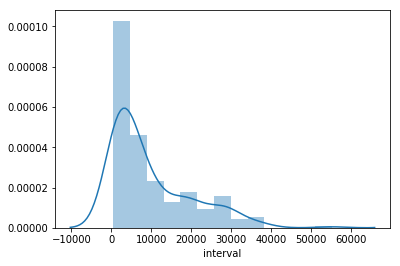

In [40]:
#checking distribution of literacy of the world
sns.distplot(np.array(gdp_no_nan),axlabel="interval")

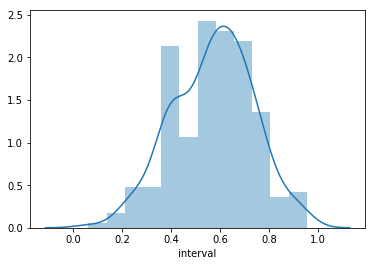

In [41]:
sns.distplot(np.array(df['Service']),axlabel="interval")

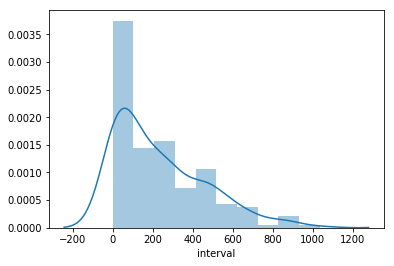

In [42]:
sns.distplot(np.array(df['Phones (per 1000)']),axlabel="interval")


## Joint Plot

It allows us to combine to dist plot for bivarinat data(two variables).
The linnear regression shows a trend that as we go higher in Phones(per 1000) you go higer in GPD that makes sense because GDP and Phones(per 1000) 

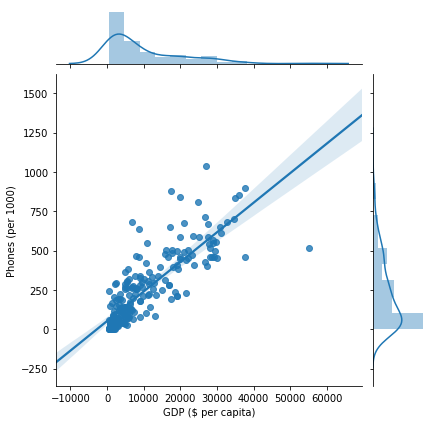

In [43]:
sns.jointplot(x='GDP ($ per capita)',y='Phones (per 1000)',data=df,kind='regg')

The below linear regression shows a negative relationship between the variables. This because as the the Birthrate increases the GDP decreases. 

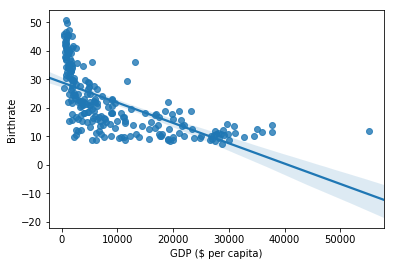

In [44]:
sns.regplot(x='GDP ($ per capita)', y='Birthrate', data=df)

In [45]:
df.groupby('Region')[['GDP ($ per capita)', 'Phones (per 1000)', 'Service']].median()

,GDP ($ per capita),Phones (per 1000),Service
Region,,,
ASIA (EX. NEAR EAST),3450.0,61.50,0.4950
BALTICS,11400.0,321.40,0.6660
C.W. OF IND. STATES,3450.0,155.35,0.4595
EASTERN EUROPE,9100.0,296.05,0.5910
LATIN AMER. & CARIB,6300.0,222.85,0.6180
NEAR EAST,9250.0,211.00,0.5840
NORTHERN AFRICA,6000.0,123.60,0.4255
NORTHERN AMERICA,29800.0,683.20,0.7870
OCEANIA,5000.0,118.60,0.6440


## Conclusion  

As a result of the analysis performed in this project, the following points have been inferred:
1. There exists a positive correlation between GDP and Phones as well as GDP and Service.
2. There exists a negative correlation between GDP and Birthrate.
3. As the Climate and Region are categorical values and Climate does not affect the GDP in anyway we have used Region for coloring while plotting the pair plot.
Also, these conclusions can be used to build a regression model

## Contribution statements

1. The error present was because of the Nan values and missing values were replaced by finding the median of the variables but for climate we used mode to fill the missing values because it is a categorical value.
2. A Pair plot using categorical variable was used for analysis.
3. A Joint Plot was used for analysis of bivariant data as Dist Plot can only be used of analysis of single variable.

- code by own: 30%
- code by external source:70%

## Citations

[1] Kaggle. Predicting GDP: world countries. Reviewed dataset. Available at: https://www.kaggle.com/stieranka/predicting-gdp-world-countries 

[2] Seaborn 0.9.0 documentation. Available at:https://seaborn.pydata.org/index.html

[3] Twelve useful Pandas techniques in Python for data manipulation. Analytics Vhidya. Available at: https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/.

[4]Python Data Science Handbook. Available at:https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html

[5]Understanding box plot. Available at:https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

[6]Joint Plot documentation. Available at:https://seaborn.pydata.org/generated/seaborn.jointplot.html

## License

Copyright <2019>  Viraj Jani

Permission is hereby granted, free of charge, to any person obtaining a copy of this notebook and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
